## Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1]
X = iris[:,0:-1]
X.shape


(148, 4)

### Soln 1.1. 148 the number of data points and 4 is the number of features

### Soln 1.2.

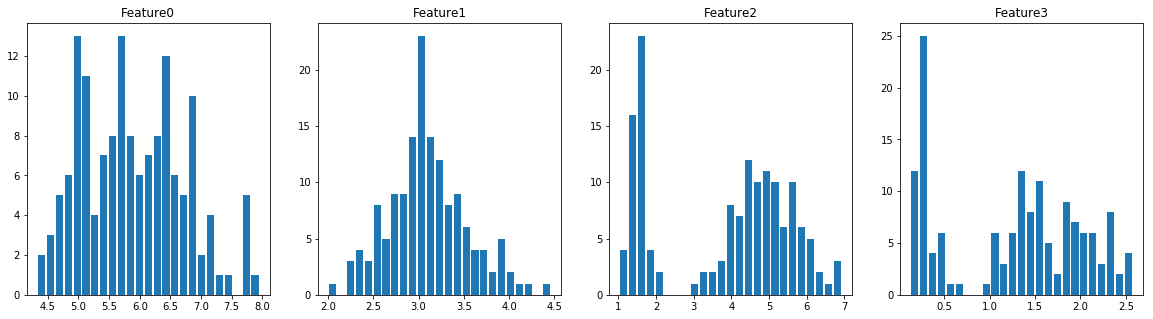

In [3]:
figure, axes = plt.subplots(1,4,figsize=(20,5))
for col in range(axes.shape[0]):
    axes[col].set_title('Feature' + str(col))
    axes[col].hist(X[:,col],bins = 25,rwidth = 0.8)
    

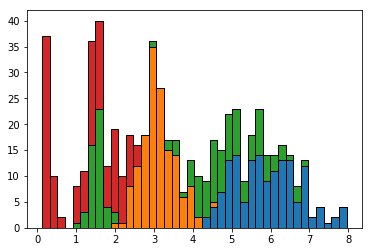

In [6]:
plt.hist([X[:,i] for i in range(X.shape[1])], bins=40,histtype='barstacked',edgecolor='black')
plt.show()

### Soln 1.3.

In [139]:
mean_value = np.mean(X,axis=0)
std_dev = np.std(X,axis=0)
for i in range(mean_value.shape[0]):
    print('Mean value for Feature' + str(i + 1) + ': ' + str(mean_value[i]))
    print('Std deviation value for Feature' + str(i + 1) + ': ' + str(std_dev[i]) + '\n')

Mean value for Feature1: 5.90010376418919
Std deviation value for Feature1: 0.8334020667748939

Mean value for Feature2: 3.0989309168918906
Std deviation value for Feature2: 0.43629183800107696

Mean value for Feature3: 3.819554840540539
Std deviation value for Feature3: 1.7540571093439354

Mean value for Feature4: 1.252555484594594
Std deviation value for Feature4: 0.7587724570263247



### Soln 1.4.

#### Scatter plot between features 1 and 2

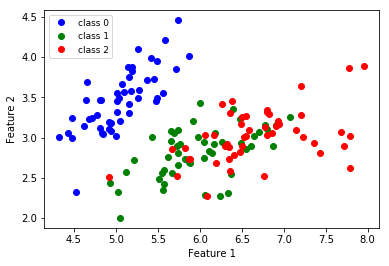

In [101]:
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[Y==c,0],X[Y==c,1],'o',color=colors[int(c)],label='class {}'.format(int(c)))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left',prop={'size': 9})
plt.show()

#### Scatterplot between features 1 and 3

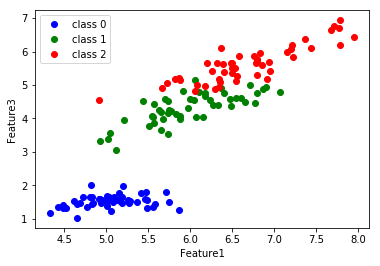

In [100]:
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[Y==c,0], X[Y==c,2], 'o', c=colors[int(c)],label='class {}'.format(int(c)))
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.legend(prop={'size':10})
plt.show()

#### Scatterplot between features 1 and 4

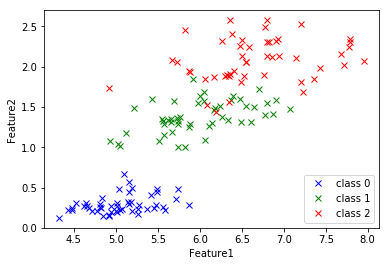

In [99]:
colors = ['b','g','r']
for c in np.unique(Y):
    plt.plot(X[Y==c,0], X[Y==c,3], 'x', c=colors[int(c)],label='class {}'.format(int(c)))
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend(loc='lower right')
plt.show()

## Problem 2

In [79]:
#X,Y = ml.shuffleData(X,Y)
np.random.seed(0)
import mltools as ml
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75)

### Soln 2.1.

In [78]:
Xtr1 = Xtr[:,0:2]
Xva1 = Xva[:,0:2]

#### Classification boundary when K = 1

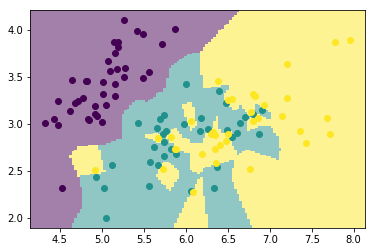

In [80]:
knn1 = ml.knn.knnClassify()
knn1.train(Xtr1,Ytr,1)
ml.plotClassify2D(knn1, Xtr1, Ytr );

#### Classification boundary when K = 5

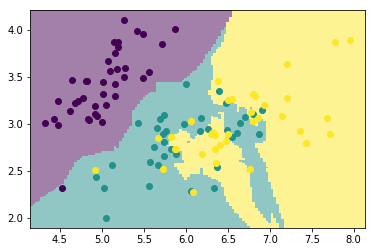

In [81]:
knn5 = ml.knn.knnClassify(Xtr1, Ytr, 5)
ml.plotClassify2D(knn5, Xtr1,Ytr)

#### Classification boundary when K = 10

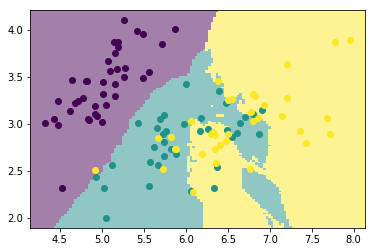

In [63]:
knn10 = ml.knn.knnClassify(Xtr1, Ytr, 10)
ml.plotClassify2D(knn10, Xtr1,Ytr)

#### Classification boundary when K = 50

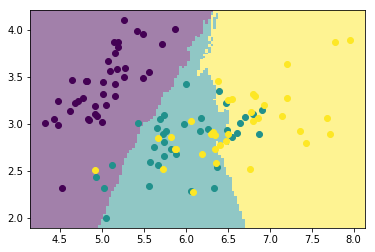

In [82]:
knn50 = ml.knn.knnClassify(Xtr1, Ytr, 50)
ml.plotClassify2D(knn50, Xtr1,Ytr)

### Soln 2.2.

#### Training data(2 features) error for different values of k

In [148]:
K=[1,2,5,10,50,100,200]
errTrainTwoFeat = [None] * len(K)
print('Error rate on training data with 2 features')
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr1, Ytr, k)
    Yhat = learner.predict(Xtr1)
    errTrainTwoFeat[i] = np.sum(Ytr != Yhat)/len(Ytr)
    print('K=' + str(k) +', Error rate: ' + str(errTrainTwoFeat[i]))

Error rate on training data with 2 features
K=1, Error rate: 0.0
K=2, Error rate: 0.11711711711711711
K=5, Error rate: 0.13513513513513514
K=10, Error rate: 0.18018018018018017
K=50, Error rate: 0.26126126126126126
K=100, Error rate: 0.4144144144144144
K=200, Error rate: 0.6486486486486487


#### Validation data(2 features) error with different k

In [149]:
errValidTwoFeat = [None] * len(K)
print('Error rate on validation data with 2 features')
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr1, Ytr, k)
    YvaHat = learner.predict(Xva1)
    #print(len(YvaHat))
    errValidTwoFeat[i] = np.sum(Yva != YvaHat)/len(Yva)
    print('K=' + str(k) +', Error rate: ' + str(errValidTwoFeat[i]))

Error rate on validation data with 2 features
K=1, Error rate: 0.2972972972972973
K=2, Error rate: 0.2972972972972973
K=5, Error rate: 0.2702702702702703
K=10, Error rate: 0.3783783783783784
K=50, Error rate: 0.13513513513513514
K=100, Error rate: 0.32432432432432434
K=200, Error rate: 0.7297297297297297


#### Plotting training and validation errors(2 features) on semilogx plot

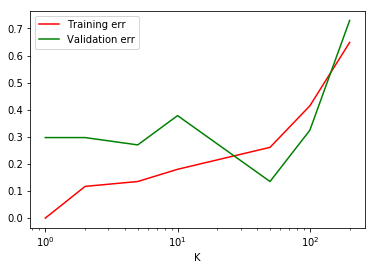

In [150]:
#colors = ['R','G']
plt.semilogx(K,errTrainTwoFeat,c='R')
plt.semilogx(K,errValidTwoFeat,c='G')
plt.legend(['Training err','Validation err'])
plt.xlabel('K')
plt.show()

#### K value of 50 is the best in this case as that is the reflection point for validation error

### Soln 2.3

#### Training data(all features) error for different values of k

In [156]:
errTrainFourFeat = [None] * len(K)
print('Error rate on training data with all features')
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrainFourFeat[i] = np.sum(Ytr != Yhat)/len(Ytr)
    print('K=' + str(k) +', Error rate: ' + str(errTrainFourFeat[i]))

Error rate on training data with all features
K=1, Error rate: 0.0
K=2, Error rate: 0.02702702702702703
K=5, Error rate: 0.018018018018018018
K=10, Error rate: 0.018018018018018018
K=50, Error rate: 0.11711711711711711
K=100, Error rate: 0.3783783783783784
K=200, Error rate: 0.6486486486486487


#### Validation data(4 features) error for different values of k

In [157]:
errValidFourFeat = [None] * len(K)
print('Error rate on validation data with all features')
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    Yvahat = learner.predict(Xva)
    errValidFourFeat[i] = np.sum(Yva != Yvahat)/len(Yva)
    print('K=' + str(k) +', Error rate: ' + str(errValidFourFeat[i]))

Error rate on validation data with all features
K=1, Error rate: 0.05405405405405406
K=2, Error rate: 0.02702702702702703
K=5, Error rate: 0.02702702702702703
K=10, Error rate: 0.02702702702702703
K=50, Error rate: 0.05405405405405406
K=100, Error rate: 0.3783783783783784
K=200, Error rate: 0.7297297297297297


#### Plotting training and validation errors(all features) on semilogx plot

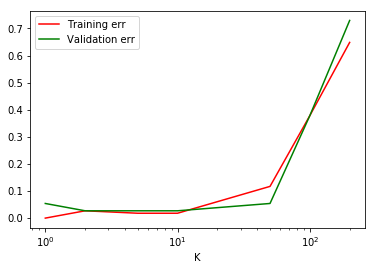

In [147]:
plt.semilogx(K,errTrainFourFeat,c='R')
plt.semilogx(K,errValidFourFeat,c='G')
plt.legend(['Training err','Validation err'])
plt.xlabel('K')
plt.show()

#### The plots are somewhat different because of the fact that due to more data(features) available, the training has been better with 4 features, hence, when k value is < 50 (model is increasing in complexity), the prediction is much better for both the training data and validation data and error rates are less. 
### The value of k that I would suggest in this case is 10 as both the training and validation error is the least at both k = 5 and k = 10. But k = 5 is more complex than k = 10, hence there is a higher chance of overfitting the data using k = 5 model and k = 5 would be more expensive computationally.

## Problem 3

### Soln 3.1

\begin{equation*}
\hat{P}(y = -1) = \frac{6}{10}\\
\end{equation*}

\begin{equation*}
\hat{P}(x_1 = 1|y = -1) = \frac{3}{6}\\
\hat{P}(x_2 = 1|y = -1) = \frac{5}{6}\\
\hat{P}(x_3 = 1|y = -1) = \frac{4}{6}\\
\hat{P}(x_4 = 1|y = -1) = \frac{5}{6}\\
\hat{P}(x_5 = 1|y = -1) = \frac{2}{6}\\
\end{equation*}

\begin{equation*}
\hat{P}(x_1 = 1|y = 1) = \frac{3}{4}\\
\hat{P}(x_2 = 1|y = 1) = 0\\
\hat{P}(x_3 = 1|y = 1) = \frac{3}{4}\\
\hat{P}(x_4 = 1|y = 1) = \frac{2}{4}\\
\hat{P}(x_5 = 1|y = 1) = \frac{1}{4}\\
\end{equation*}



### Soln 3.2

(i) The class for input feature vector X = {0 0 0 0 0} is predicted depending on which of two below probabilities is higher 
\begin{equation*}
\hat{P}(y = 1|X)\ or \hat{P}(y = -1|X)\
\end{equation*}

#### Calculating the first probability

\begin{equation*}
\hat{P}(y = 1|x_1 = 0,x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0)\
\end{equation*}

Applying Bayes' theorem, we get

\begin{equation*}
= \frac{\hat{P}(y = 1)*\hat{P}(x_1 = 0,x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0|y = 1)}{\hat{P}(x_1 = 0,x_2 = 0,x_3 = 0, x_4 = 0, x_5 = 0)}\
\end{equation*}

As we are comparing two probabilities, we ignore the denominator terms in both(as they are same in both) and just compare the numerators.<br><br>
Assuming all features are conditionally independent given a class(because of Naive Bayes' classification), we can write the numerator above as follows:

\begin{equation*}
= \hat{P}(y = 1)*\hat{P}(x_1 = 0|y = 1)*\hat{P}(x_2 = 0|y = 1)*\hat{P}(x_3 = 0|y = 1)*\hat{P}(x_4 = 0|y = 1)*\hat{P}(x_5 = 0|y = 1)\
\end{equation*}

Substituting the values of probabilities from 3.1, we get 

\begin{equation*}
= \frac{4}{10}*\frac{1}{4}*\frac{4}{4}*\frac{1}{4}*\frac{2}{4}*\frac{3}{4}\\
= \frac{3}{320}\
\end{equation*}


#### Similarly, we can calculate the second probability

\begin{equation*}
\hat{P}(y = -1|x_1 = 0,x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0)\
\end{equation*}

Applying Bayes' theorem, we get

\begin{equation*}
= \frac{\hat{P}(y = -1)*\hat{P}(x_1 = 0,x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0|y = -1)}{\hat{P}(x_1 = 0,x_2 = 0,x_3 = 0, x_4 = 0, x_5 = 0)}\
\end{equation*}

Applying the same assumptions as above, we get

\begin{equation*}
= \hat{P}(y = -1)*\hat{P}(x_1 = 0|y = -1)*\hat{P}(x_2 = 0|y = -1)*\hat{P}(x_3 = 0|y = -1)*\hat{P}(x_4 = 0|y = -1)*\hat{P}(x_5 = 0|y = -1)\
\end{equation*}

Substituting the values of probabilities from 3.1, we get

\begin{equation*}
= \frac{6}{10}*\frac{3}{6}*\frac{1}{6}*\frac{2}{6}*\frac{1}{6}*\frac{4}{6}\\
= \frac{1}{540}\
\end{equation*}

#### As
\begin{equation*}\hat{P}(y = 1|X)\ > \hat{P}(y = -1|X)\
\end{equation*}

#### The class predicted for X = {0 0 0 0 0} is y = 1 or "email read"

<br>
<br>
(ii) The class for input feature vector X = {1 1 0 1 0} is predicted depending on which of two below probabilities is higher 

\begin{equation*}
\hat{P}(y = 1|X)\ or \hat{P}(y = -1|X)\
\end{equation*}

#### Calculating the first probability

\begin{equation*}
\hat{P}(y = 1|x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0)\
\end{equation*}

Applying Bayes' theorem, we get

\begin{equation*}
= \frac{\hat{P}(y = 1)*\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0|y = 1)}{\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0, x_4 = 1, x_5 = 0)}\
\end{equation*}

Applying the same assumptions as above, we get

\begin{equation*}
= \hat{P}(y = 1)*\hat{P}(x_1 = 1|y = 1)*\hat{P}(x_2 = 1|y = 1)*\hat{P}(x_3 = 0|y = 1)*\hat{P}(x_4 = 1|y = 1)*\hat{P}(x_5 = 0|y = 1)\
\end{equation*}

Substituting the values of probabilities from 3.1, we get 

\begin{equation*}
\frac{4}{10}*\frac{3}{4}*\frac{0}{4}*\frac{1}{4}*\frac{2}{4}*\frac{3}{4}\\
= 0
\end{equation*}

#### Similarly, we can calculate the second probability

\begin{equation*}
\hat{P}(y = -1|x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0)\
\end{equation*}

Applying Bayes' theorem, we get

\begin{equation*}
= \frac{\hat{P}(y = -1)*\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0|y = -1)}{\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0, x_4 = 1, x_5 = 0)}\
\end{equation*}

Applying the same assumptions as above, we get

\begin{equation*}
= \hat{P}(y = -1)*\hat{P}(x_1 = 1|y = -1)*\hat{P}(x_2 = 1|y = -1)*\hat{P}(x_3 = 0|y = -1)*\hat{P}(x_4 = 1|y = -1)*\hat{P}(x_5 = 0|y = -1)\
\end{equation*}

Substituting the values of probabilities from 3.1, we get

\begin{equation*}
= \frac{6}{10}*\frac{3}{6}*\frac{5}{6}*\frac{2}{6}*\frac{5}{6}*\frac{4}{6}\\
= \frac{5}{108}\
\end{equation*}

#### As
\begin{equation*}\hat{P}(y = 1|X)\ < \hat{P}(y = -1|X)\
\end{equation*}

#### The class predicted for X = {1 1 0 1 0} is y = -1 or "email discarded"
<br>
<br>

### Soln 3.3

We need to calculate 
\begin{equation*}
\hat{P}(y = 1|x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0)\
\end{equation*}'

Applying Bayes' theorem, we get

\begin{equation*}
= \frac{\hat{P}(y = 1)*\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0,x_4 = 1,x_5 = 0|y = 1)}{\hat{P}(x_1 = 1,x_2 = 1,x_3 = 0, x_4 = 1, x_5 = 0)}\
\end{equation*}

Solving the numerator first and using the assumption of conditional probability between features given y, we get,
\begin{equation*}
= \hat{P}(y = 1)*\hat{P}(x_1 = 1|y = 1)*\hat{P}(x_2 = 1|y = 1)*\hat{P}(x_3 = 0|y = 1)*\hat{P}(x_4 = 1|y = 1)*\hat{P}(x_5 = 0|y = 1)\
\end{equation*}

Substituting the values of probabilities from 3.1, we get

\begin{equation*}
= \frac{4}{10}*\frac{3}{4}*\frac{0}{4}*\frac{1}{4}*\frac{2}{4}*\frac{3}{4}\\
= 0
\end{equation*}

Hence, the posterior probability that y = +1 given X = (1 1 0 1 0) is 0(according to the Naive Bayes' classifier)


### Soln 3.4
We should not use "joint" Bayes classifier for these data as for that we require all the 2^5(for 5 features) to be present in our training data set(thus greatly expanding the memory cost with increasing number of features and sometimes even impossible to fit in memory if number of features is large). This is because, if we use "joint" Bayes classifier, we need to calculate the term 
\begin{equation*}
\hat{P}(X|y)\
\end{equation*}
and if that row with particular feature values is not present in our training data set(contingency table), then the learner will predict a posterior probability of y given X as 0 always. So, with these data, we are only given 10 out of a possible 2^5(32) rows. So, for the 22 missing combinations of features, the "joint" Bayes classifier would predict a posterior probabilty of 0.

For example, if we want to predict the posterior probability that y = +1 when X = (1 0 1 0 1), our "joint" Bayes classifier would predict it as 0 as that particular feature row is not present.

#### Second reason
could be that as we become over dependent(overfitting) on the input data in "joint" Bayes classifier, if some of the data points are outliers(which is quite common), our predictor would predict wrong values for them.
For example, say the first row of our contingency table is an outlier, i.e. for X(0 0 1 1 0), maybe actually the real class value is y = +1 instead of y = -1(as given in the table), but our classifier would always predict it wrong.

### Soln 3.5
We don't need to retrain if we lose one of the features(say x_1 as given in the question). This is because in Naive Bayes' classifier, we assume that all the features are conditionally independent given a class value. So, if we lose a feature, we just need to drop the conditional probability for that feature while predicting the posterior of y(being equal to a value) given X. We don't need to recalculate the
\begin{equation*}
\hat{P}(x_i|y)\ 
\end{equation*}
for i = 2,3,4,5, as that would remain the same.
Also,
\begin{equation*}
\hat{P}(y)
\end{equation*} would also be the same. 

Only while calculating the prediction of posterior probability of y given X, we need to drop that feature.

Example, now to calculate the probability that y = +1 given X = (0 0 0 0)
we need to evaluate,
\begin{equation*}
\hat{P}(y = 1|x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0)\
\end{equation*}

which converts to 
\begin{equation*}
= \frac{\hat{P}(y = 1)*\hat{P}(x_2 = 0,x_3 = 0,x_4 = 0,x_5 = 0|y = 1)}{\hat{P}(x_2 = 0,x_3 = 0, x_4 = 0, x_5 = 0)}\
\end{equation*}

which can be done with the earlier trained values as mentioned above. Hence, no retraining needed in this case.

# Statement of Collaboration

As a newbie to Python, I have asked the help of my friend Pranav Udupa and stackoverflow for the syntax of various elements of Python. I have also used some code from the week 1 ML discussion. I also used https://jupyter-notebook.readthedocs.io to understand how to use mathematical expressions in markdown.